In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv('sales_train.csv')
df_test = pd.read_csv('test.csv')
df_shops = pd.read_csv('shops.csv')
df_items = pd.read_csv('items.csv')
df_item_cats = pd.read_csv('item_categories.csv')

In [12]:
print(df_train.info())
print(df_shops.info())
print(df_items.info())
print(df_item_cats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170

In [11]:
df_shops['shop_name'].str.split(' ').map(lambda x: x[0]).unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [2]:
 pd.read_csv('item_categories.csv')

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


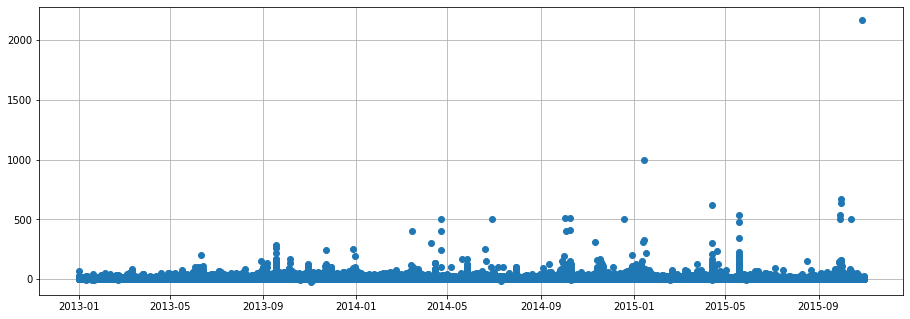

In [5]:
df_eda = df_train.copy()
df_eda = pd.merge(df_eda, df_items, on='item_id', how='left')
df_eda = pd.merge(df_eda, df_item_cats, on='item_category_id', how='left')

df_eda['date'] = pd.to_datetime(df_eda['date'], format='%d.%m.%Y')
df_eda['month'] = df_eda['date'].dt.month
df_eda['date_from_start'] = df_eda['date'] - df_eda['date'].min()
df_eda['item_type'] = df_eda['item_category_name'].str.split('-').map(lambda x: x[0].strip())

# SIMPLE SCATTER PLOT FOR NOT AGGREGATED TARGET VALUES BY DATE
ax =plt.axes([0, 0, 2, 1])
ax.plot(df_eda['date'], df_eda['item_cnt_day'], marker='.', linestyle='', ms=12)
ax.grid(True)

In [6]:
# check for outliers, appears to be online orders and packets may have such count, so leving them as is at least for now
df_eda[df_eda['item_cnt_day'] > 800]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,month,date_from_start,item_type
2326930,2015-01-15,24,12,20949,4.000000,1000.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",1,744 days,Подарки
2909818,2015-10-28,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,10,1030 days,Доставка товара


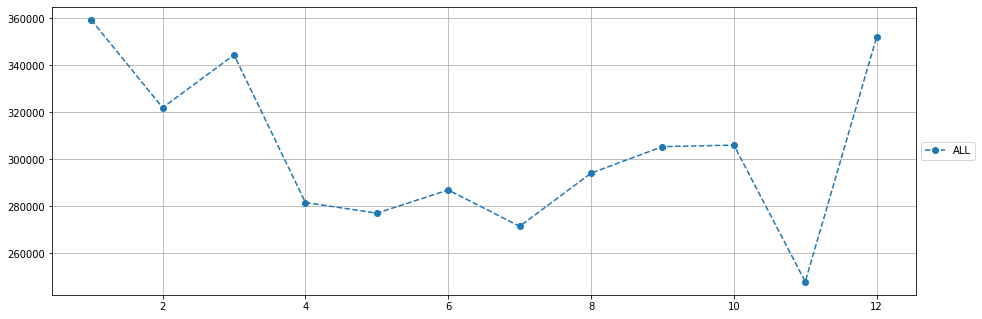

In [7]:
# Overall item count by month, we may use month as a feature
ax =plt.axes([0, 0, 2, 1])
group_all = df_eda.groupby(['month'], as_index=False)['item_cnt_day'].sum()
ax.plot(group_all['month'], group_all['item_cnt_day'], marker='.', linestyle='--', ms=12, label="ALL")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
plt.show()

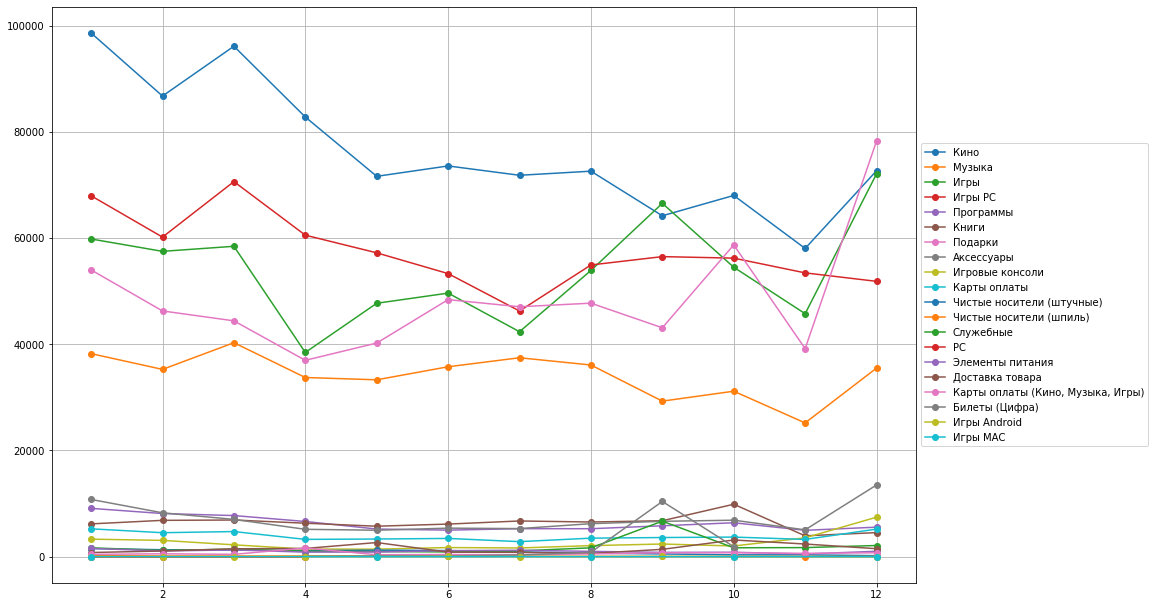

In [8]:
# scatter aggregated by month and item type, there are trends as well 
group = df_eda.groupby(['month', 'item_type'], as_index=False)['item_cnt_day'].sum()
ax =plt.axes([0, 0, 2, 2])

for item_type in df_eda['item_type'].unique():
    type_group = group[group['item_type'] == item_type]
    ax.plot(type_group['month'], type_group['item_cnt_day'], marker='.', linestyle='-', ms=12, label=item_type)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
plt.show()

In [23]:
df_item_cats['item_category_name'].sort_values().values

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',